In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import sklearn
print(sklearn.__version__)


1.3.0


### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
X_train = df_train.drop(columns = ["quality"])
df_train["quality"] = np.where(df_train['quality'] < 7, 0, 1) 
y_train = df_train.quality

In [8]:
final_pipe = Pipeline([('preprocessing', MinMaxScaler()),
                ('clf',LogisticRegression(penalty=None,solver='newton-cg'))])
final_pipe.fit(X_train, y_train)
final_pipe.score(X_train, y_train)

0.7634782608695653

In [9]:
# Блок предсказания с использованием тестового набора

In [10]:
y_predict = final_pipe.predict(df_test)

In [11]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict;

0.689119170984456

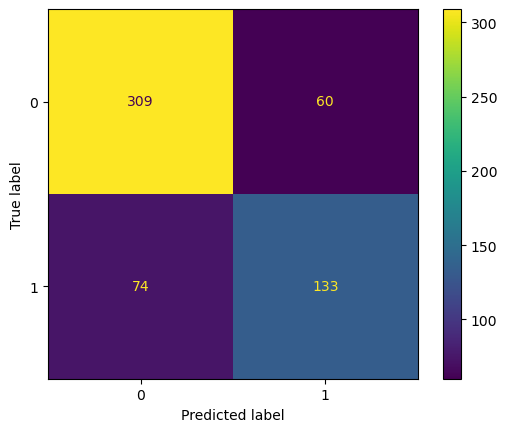

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)